# CUSTOMER CHRUN ANALYSIS PROJECT

In [1]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\kokan\appdata\local\programs\python\python312\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### INSPECTION OF DATA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### >>we can see MonthlyCharges has dtype as object, after analyzing the column (MonthlyCharges) in csv file we can see their are blank cells, which is due to Tenure is zero which means customer has just started their journey with company.
##### >>Make blank columns replace with zero (0) & change dtype object to float64.

## Replacing blanks with zero (0) as tenure is zero (0) & no total charges are recorded

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### >>after running above code the TotalCharges dtype changed from object to float64

## Checking Null Values

### checking for each column

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### checking for overall columns at onetime

In [13]:
df.isnull().sum().sum()

0

##### >>There are no null values in the data sheet.

## Discriptive Analysis of data

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## finding duplicates

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

### checking duplicates onetime

In [16]:
df.duplicated().sum()

0

##### >>There are no duplicates in the given data with respect to entire row

## Checking duplicates with the help unique id or "customerID"

In [17]:
df["customerID"].duplicated().sum()

0

##### >> We can see their is no data enroll with the same customerID =, which indicates their are no duplicates at all in this data sheet
##### >> Why checking Unique Id for supicates is important?
##### >> We should not just check entire column for but also unique id coz; Data can also have different data with same UniqueID so one should aslo check data duplication with uniqueid as well.

## Convert 0 & 1 values of column SeniorCitizen to "NO" or "YES" to make it easier to understand.

In [18]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### >> We can see that we have converted "SeniorCitizen" column from 0 & 1 to "Yes/No".

## Q1. To analyse how many customers have churn out from our business ?

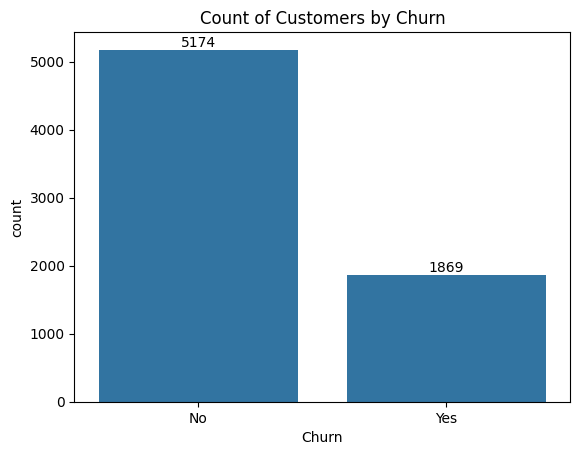

In [20]:
ax = sns.countplot(x= "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

#### >> From above countplot we can analyse that from 7043 customers 1869 customers have churn out from the Business.

## How to count Churn out in percentage? It can be done through Pie Chart.

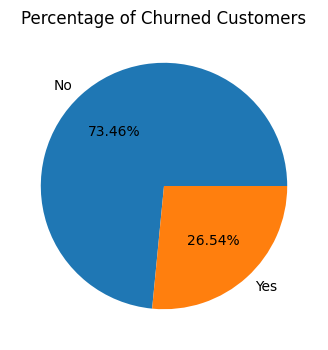

In [21]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn': 'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title("Percentage of Churned Customers")
plt.show()

#### >> From the given pie chart we can conclude that 26.54% of our customers have churned out.
#### >>Now lets explore reson behind it.

## Analyze Churn by Gender

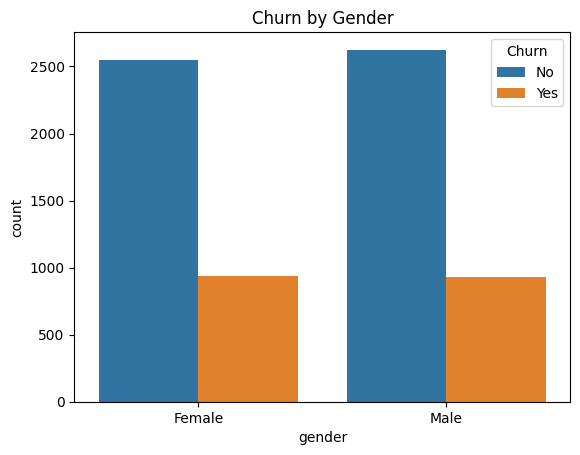

In [22]:
sns.countplot(x = 'gender', data = df, hue = "Churn")
plt.title('Churn by Gender')
plt.show()

## Analyse Churn by SeniorCitizen.

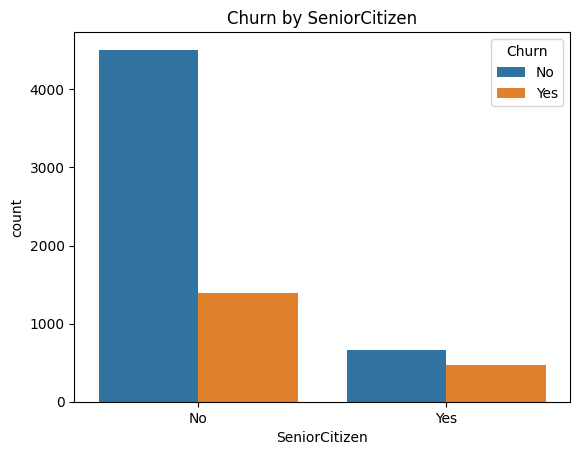

In [23]:
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

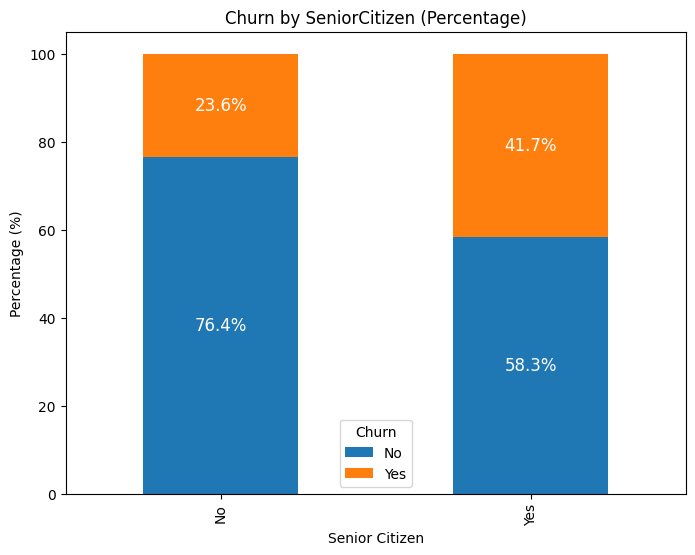

In [24]:
# Create a crosstab to get counts
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100  # Normalize by row

# Plot Stacked Bar Chart
ax = crosstab.plot(kind="bar", stacked=True, figsize=(8,6))

# Add percentages as text labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", ha="center", va="center", fontsize=12, color="white")

plt.title("Churn by SeniorCitizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

##### >> From above Staked bar chart we can conclude that comparatively a grater percentage of people from senior category have Churned out.

## Churn on the Basis of Teneur

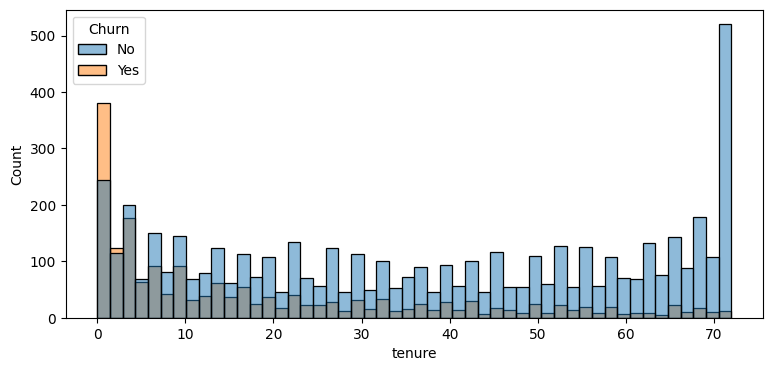

In [25]:
plt.figure(figsize= (9,4))
sns.histplot(x = "tenure", data = df, bins = 50, hue = "Churn")
plt.show()

#### >> People who have used our services for a long time have stayed and people who have used our services for one or two months have churn out.

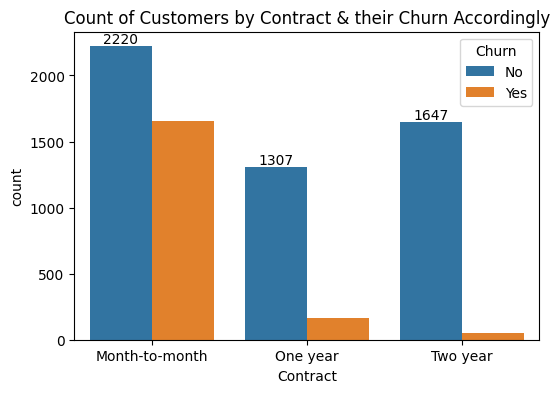

In [26]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract & their Churn Accordingly")
plt.show()

#### >> People who have month to month contract are likely to churn the from those who have 1 or 2 years of contract.

## Subplots with Count plots of PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies for analysing Churn rate.

In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

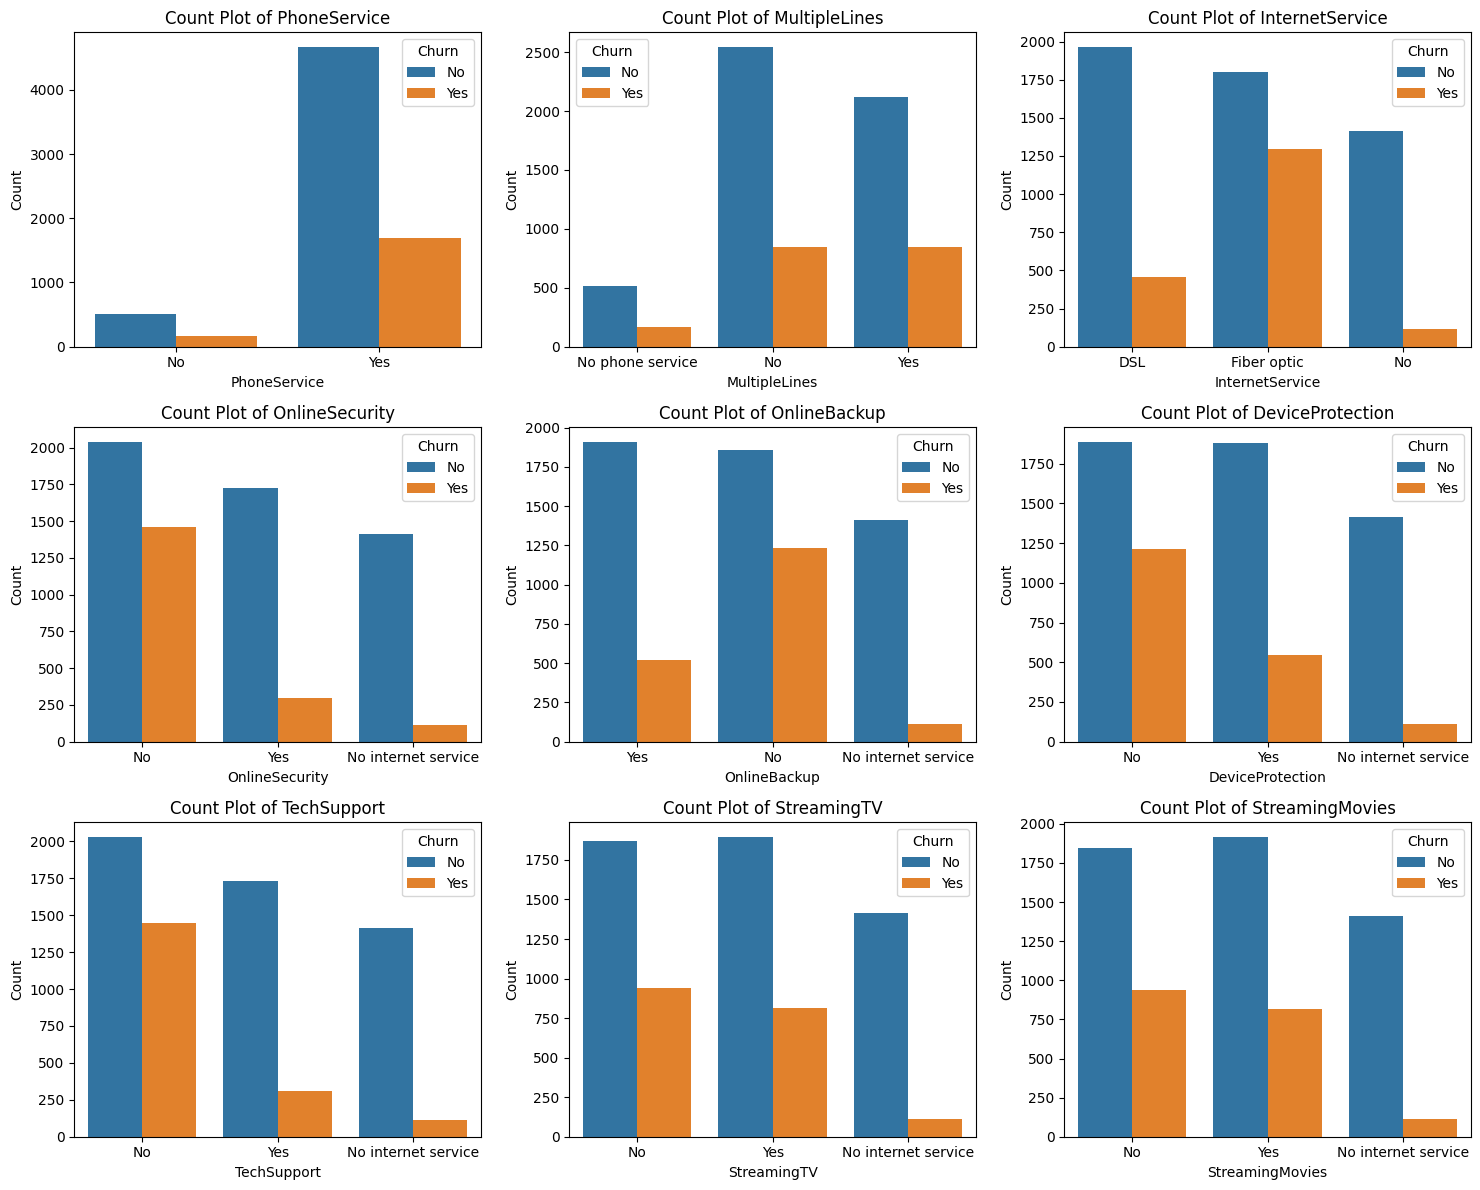

In [28]:
# Define the columns for count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']
#Number of columns for the subplot grid (you can change this)

n_cols= 3
n_rows= (len(columns) + n_cols - 1) // n_cols #calculate number of rows needed
#Create subplots
fig, axes= plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) #Adjust figsize as ne
#Flatten the axes array for easy iteration (handles both ID and 20 arrays)
axes=axes.flatten()
#Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
#Remove empty subplots (if any)
for i in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### >> The count plots illustrate the distribution of customer preferences across various telecom services, categorized by churn status. Customers who churned appear to have lower engagement with additional services such as Online Security, Tech Support, and Streaming Services. Phone and Internet services remain widely used, but churn rates vary significantly based on service type and availability. The trend suggests that value-added services may influence customer retention.

## Customers Churned by Payment Method

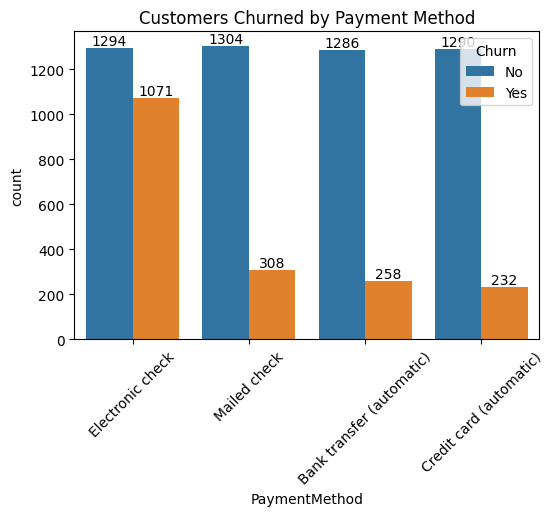

In [42]:
plt.figure(figsize= (6,4))
ax = sns.countplot(x= "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customers Churned by Payment Method")
plt.xticks(rotation = 45)
plt.show() 

#### >> Customers are likely to churn when they are using electronic check as a payment method 